## Introduction

This section explores the use of regression model on the dataset that had been cleaned and selected earlier. 


## Import Python modules

In [1]:
#import Python modules to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
#import sklearn modules 
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet 
from numbers import Number

## Import cleaned dataset

In [2]:
#import training dataset and name as df
df_selected = pd.read_csv('data/selected.csv')
df_selected.head() #checking general appearance of dataset

,house_quality,year_remodelled,basement_total_area,first_floor_area,above_ground_area,bathroom_above_ground_full_num,garage_finish_quality,garage_size_num_cars,sale_price,age_built,age_remodelled,more_than_2_above_bathrooms,is_good_kitchen_quality,is_good_exterior_build_quality,is_good_house_quality,foundation_type_PConc,comp_score
0,6,2005,725.0,725,1479,2,2,2.0,130500,34,5,1,1,1,1,0,15.0
1,7,1997,913.0,913,2122,2,2,2.0,220000,13,12,1,1,1,1,1,14.0
2,5,2007,1057.0,1057,1057,1,1,1.0,109000,57,3,0,1,0,0,0,11.0
3,5,2007,384.0,744,1444,2,3,2.0,174000,4,3,1,0,0,0,1,12.0
4,6,1993,676.0,831,1445,2,1,2.0,138500,110,17,1,0,0,1,1,12.0


In [3]:
df_selected.columns

Index(['house_quality', 'year_remodelled', 'basement_total_area',
       'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'garage_finish_quality',
       'garage_size_num_cars', 'sale_price', 'age_built', 'age_remodelled',
       'more_than_2_above_bathrooms', 'is_good_kitchen_quality',
       'is_good_exterior_build_quality', 'is_good_house_quality',
       'foundation_type_PConc', 'comp_score'],
      dtype='object')

## The Null Model
Using the mean sale_price

In [4]:
y_bar = df_selected[['sale_price']].mean() #171406.15539494064

## Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [5]:
features = [col for col in df_selected.columns if col != 'sale_price']
X = df_selected[features]
y = df_selected['sale_price']

## Model Prep: Train/test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Model Prep: Instantiate our models

In [8]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross validation

In [9]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.7617706187072903

In [10]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()
#generate cross val score with best alpha fitted with data

0.7629096145606742

In [11]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.7625369629073792

### Cross-validation results:
* Linear: 0.7617706187072907
* Lasso: 0.6694375474914178
* Ridge: 0.762015659381021

Ridge > Linear > Lasso, although the difference between Ridge and Linear is quite small (around 0.001).

## Model Fitting and Evaluation

`Ridge Regression` seem to be doing the best, so we will fit the model to the training data, and evaluate the training and test scores below.

In [17]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [24]:
#with training data
ridge.score(X_train, y_train) #0.7764694806710707

0.7764694806710707

In [25]:
#with validation data
ridge.score(X_test, y_test) #0.8396300588260664

0.8396300588260664

In [26]:
ridge_scores.mean() #0.762015659381021

0.762015659381021

In [27]:
#predicted y
pred = ridge.predict(X_test)

In [29]:
metrics.r2_score(y_test, pred) #r2_score = 0.8396300588260664

0.8396300588260664

In [33]:
#calculate RMSE for chosen model
np.sqrt(metrics.mean_squared_error(y_test, pred)) #RMSE score = 24217.464970946785 (within acceptable range)

24217.464970946785

<AxesSubplot:>

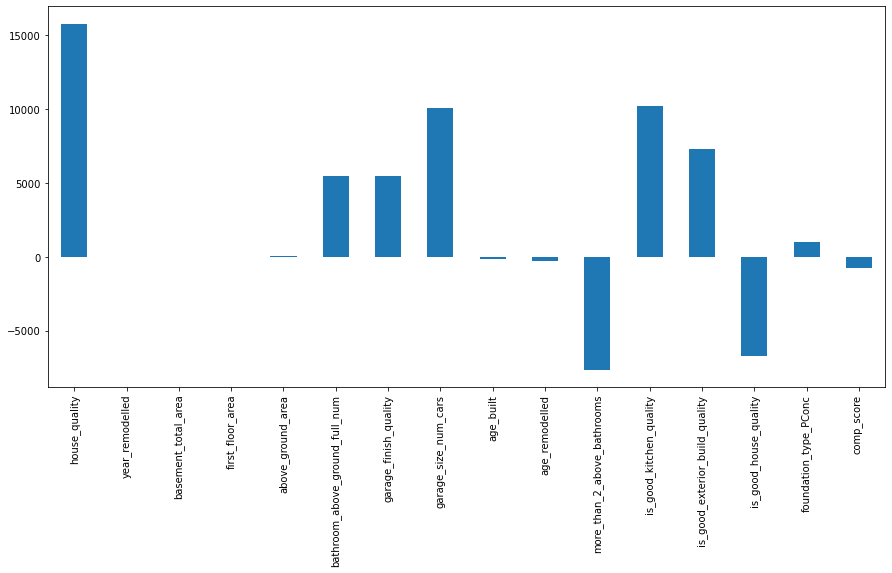

In [30]:
#layman-friendy way to show impact of features on the price
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

In [85]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':abs(ridge.coef_)})
ridge_coefs.sort_values(by = 'coef')

,variable,coef
14,foundation_type_PConc,765.514049
15,comp_score,804.110280
13,is_good_house_quality,2114.805780
1,year_remodelled,2322.740059
9,age_remodelled,2735.858442
5,bathroom_above_ground_full_num,2845.892045
10,more_than_2_above_bathrooms,3383.580850
12,is_good_exterior_build_quality,3910.475063
2,basement_total_area,4278.697156
8,age_built,4631.413550


The top 5 features that impact the sale price are:
1. house_quality
2. above_ground_area
3. garage_size_num_cars
4. is_good_kitchen_quality
5. garage_finish_quality

## Optimising Ridge Regression alpha

#### Model Prep: Scaling 

In [53]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### Optimise regression alpha with RidgeCV 

In [55]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_) #54.158713780794734

54.158713780794734
Wall time: 1.79 s


#### Checking performance with optimised alpha

In [64]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)

print (ridge_scores)
print (np.mean(ridge_scores)) #0.7633419194869943

[0.67331395 0.79398536 0.8143975  0.81636539 0.71864741]
0.7633419194869943


Compared with the score for the unoptimised Ridge (0.762015659381021), the optimised Ridge produced a slightly better score of 0.7633419194869943.

#### Checking performance with validation data

In [67]:
ridge.fit(X_train, y_train)

Ridge(alpha=54.158713780794734)

In [68]:
ridge.score(X_test, y_test) #0.8351824776577286 #poorer after optimising

0.8351824776577286

In [69]:
ridge_scores.mean() #0.7633419194869943 #slightly better after optimising

0.7633419194869943

In [70]:
pred = ridge.predict(X_test)

In [71]:
metrics.r2_score(y_test, pred) #0.8351824776577286 #poorer after optimising

0.8351824776577286

In [72]:
#calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, pred)) #24550.98301754246 #poorer after optimising

24550.98301754246

Mean score improved slightly after optimising alpha, but r2_score and RMSE became worse. The model with the unoptimised alpha seems to give better performance.

## Summary and conclusion

* Based on the cross-validation results, Ridge Regression showed slightly better scores compared to Linear Regression and Lasso CV. We further fit the Ridge model with our training and test data, and obtained an R2 score of 0.8396 and RMSE of 24217.4649, which are both within acceptable range. To further tune our model, we tried to optimise the alpha parameter, but got slightly worse scores for R2 and RMSE. 

* From the regression coefficient, our top 5 features which affect house sale prices are: 
1. house_quality - better quality houses fetch higher prices
2. above_ground_area - larger properties can expect higher prices
3. garage_size_num_cars - garages that can hold more cars can fetch better prices
4. is_good_kitchen_quality - presence of good quality kitchens can fetch better prices
5. garage_finish_quality - good quality garages fetch higher prices

## Limitations and future work

1. As we removed outlier property sales with higher sale prices, our model is likely not able to predict higher sale prices well. More data can be gathered on properties at higher sale prices ranges to improve our model.
2. Macroeconomic conditions affect sale prices as a whole, as seen from our trend visualisation for year and month. However, this would not be captured in sales data, and would require additional data sources.
3. An important factor being the location, has not been well-captured in our model. Our attempt to use a composite score has not had a high impact on the sale price (2nd lowest coeff of 804). Additional correlation with actual neighbourhood location can help us model this factor better. 
4. With more time, we can explore other combinations of composite scores and feature selection for our model